<a href="https://colab.research.google.com/github/mccoymb/AAE-590-DSMM/blob/main/590DSMM_HW3_GeneratedData_PYMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Upload the CSV file
uploaded = files.upload()


df = pd.read_excel("GeneratedExcel.xlsx")

# Extract independent and dependent variables
X = df.iloc[:, 0].values.reshape(-1, 1)  # First column as independent variable
dependent_vars = df.columns[1:13]  # Columns B-M as dependent variables
# Print X and dependent variables
print("Independent Variable (X):", X)
print("Dependent Variables:", dependent_vars.tolist())

Saving GeneratedExcel.xlsx to GeneratedExcel.xlsx
Independent Variable (X): [[0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]
 [0.4 ]
 [0.45]
 [0.5 ]
 [0.55]
 [0.6 ]
 [0.65]
 [0.7 ]]
Dependent Variables: ['Holes 1mm', 'Mat A 1mm', 'Mat B 1mm', 'Holes 5mm', 'Mat A 5mm', 'Mat B 5mm', 'Holes 100N', 'Mat A 100N', 'Mat B 100N', 'Holes 500N', 'Mat A 500N', 'Mat B 500N']


Output()

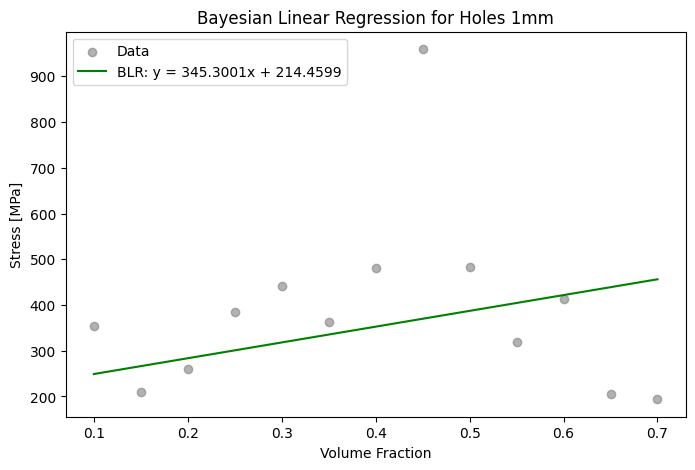

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


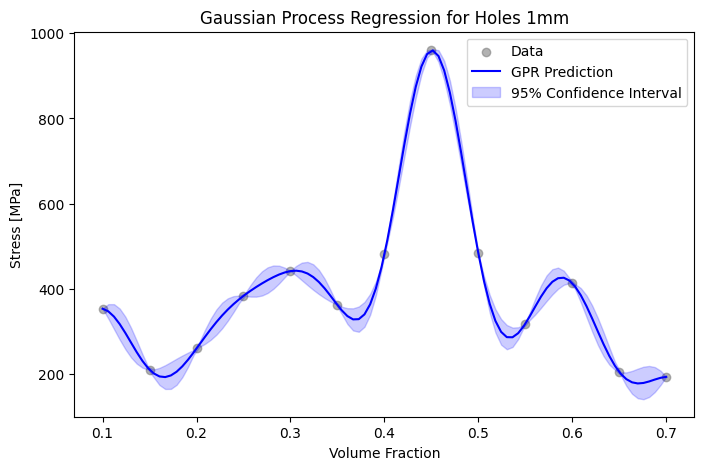

In [36]:
col_index = 1
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=213.8, sigma=1)  # Intercept
    beta = pm.Normal("beta", mu=200, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Stress [MPa]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

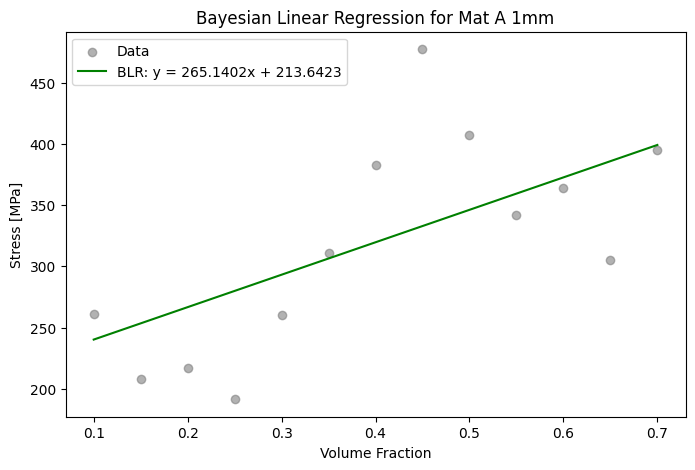

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


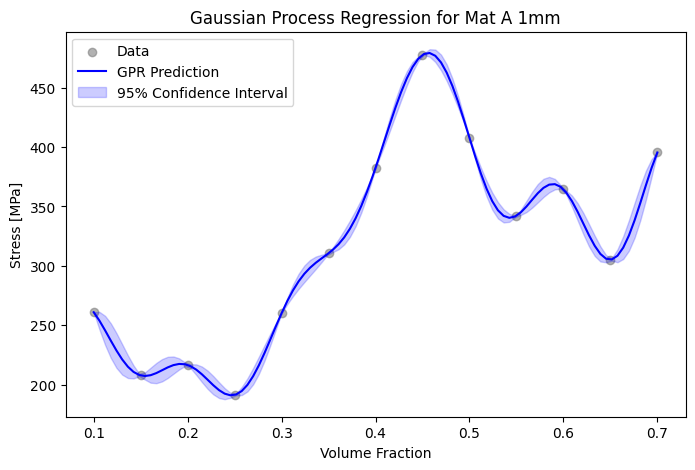

In [37]:
col_index = 2
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=213.8, sigma=1)  # Intercept
    beta = pm.Normal("beta", mu=200, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Stress [MPa]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

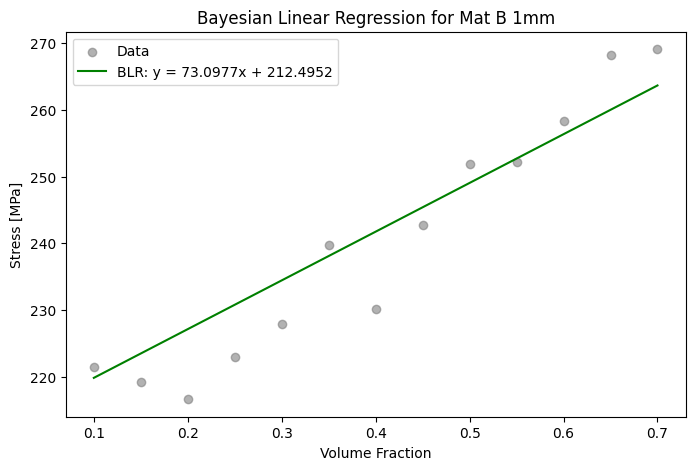

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


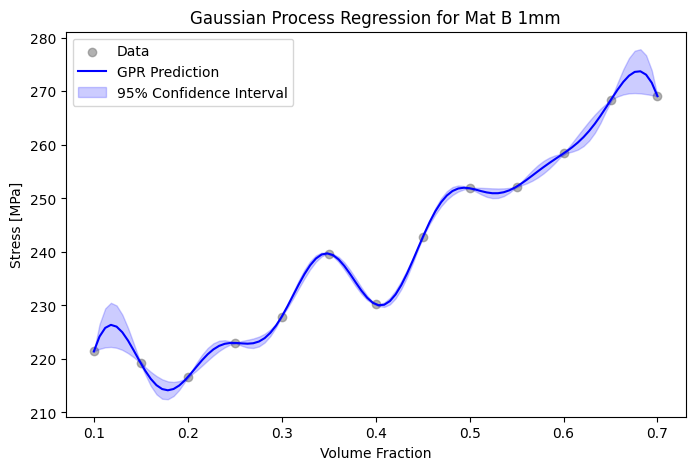

In [38]:
col_index = 3
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=213.8, sigma=1)  # Intercept
    beta = pm.Normal("beta", mu=100, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Stress [MPa]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

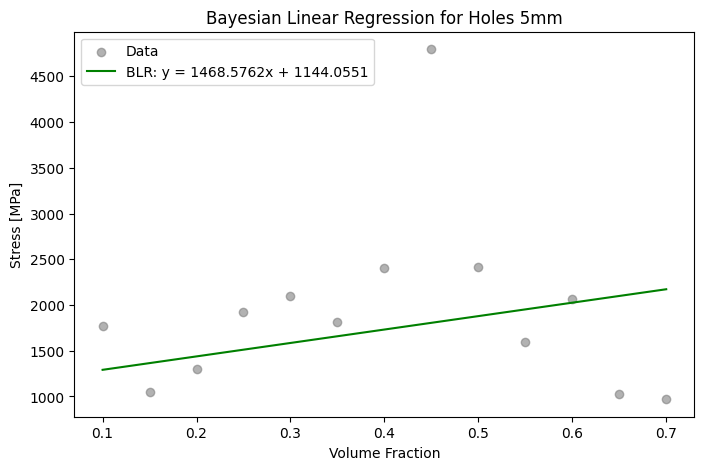

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


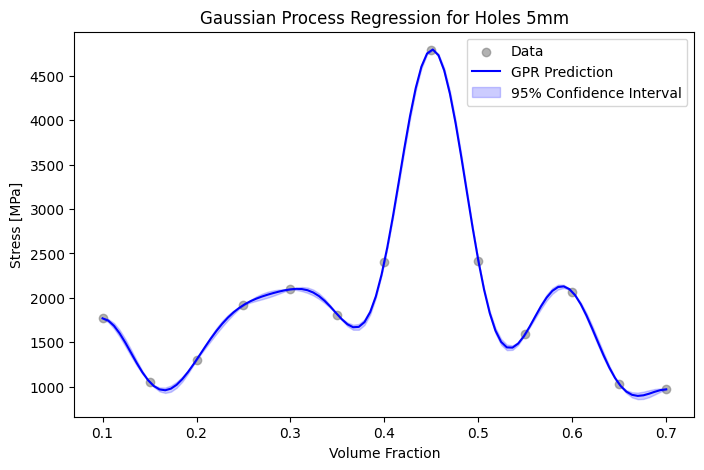

In [40]:
col_index = 4
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=1069, sigma=10)  # Intercept
    beta = pm.Normal("beta", mu=200, sigma=100)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Stress [MPa]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

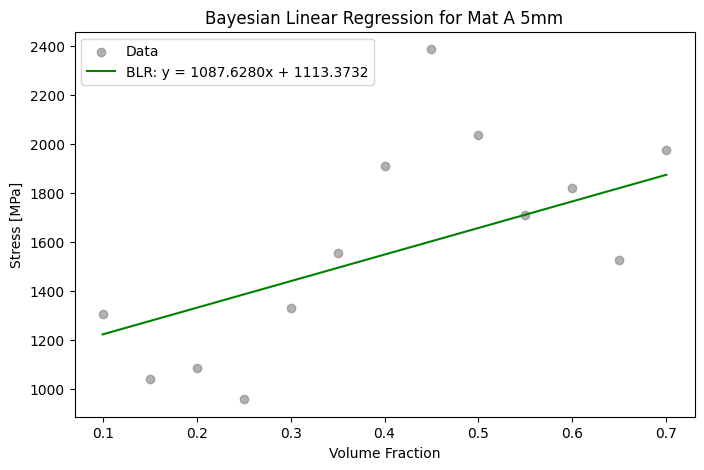

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


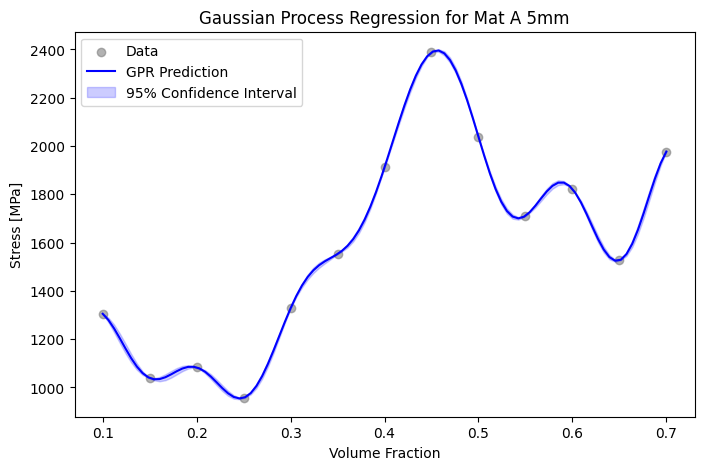

In [42]:
col_index = 5
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=1069, sigma=10)  # Intercept
    beta = pm.Normal("beta", mu=200, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Stress [MPa]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

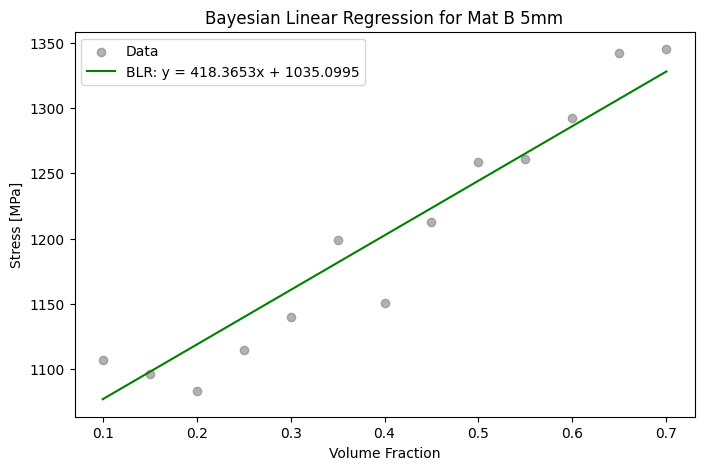

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


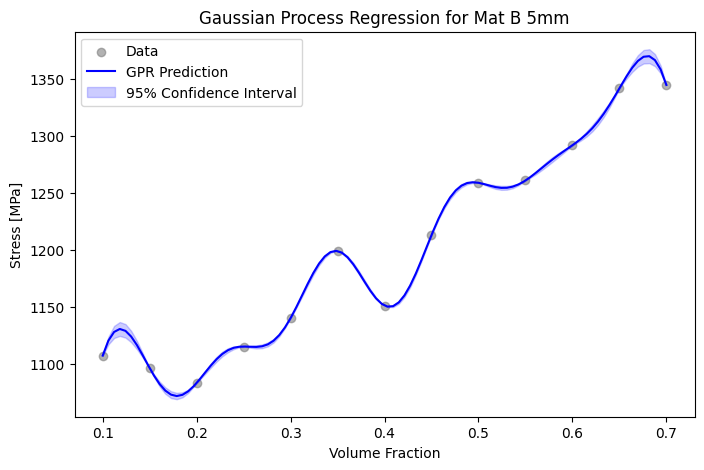

In [43]:
col_index = 6
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=1069, sigma=10)  # Intercept
    beta = pm.Normal("beta", mu=200, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Stress [MPa]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

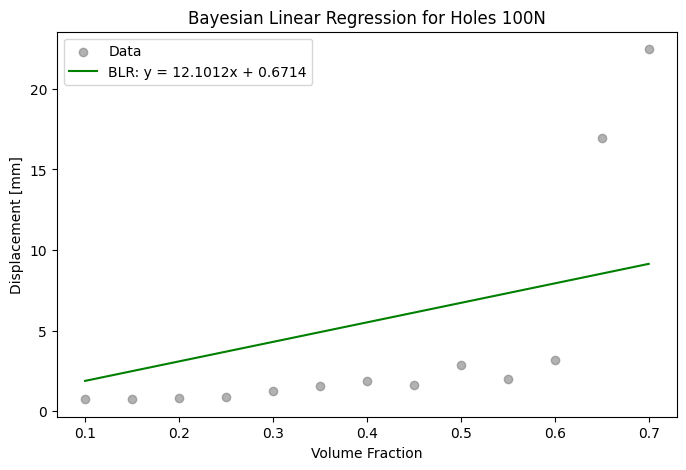

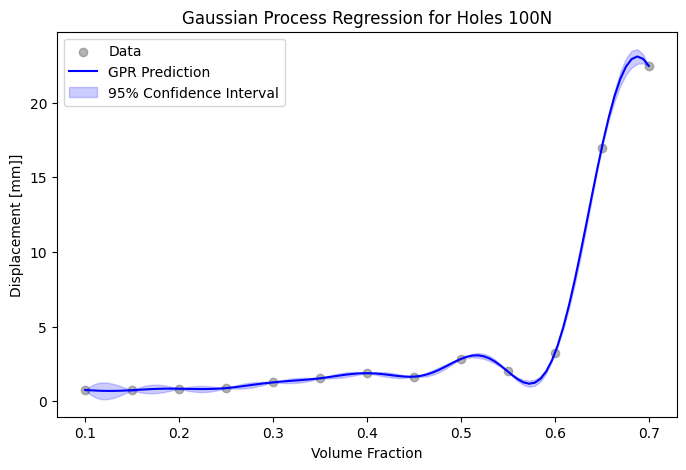

In [44]:
col_index = 7
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=0.6716, sigma=0.01)  # Intercept
    beta = pm.Normal("beta", mu=2, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Displacement [mm]]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

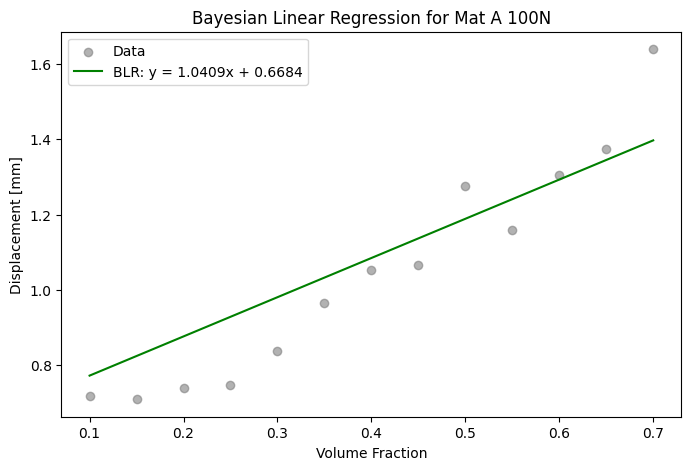

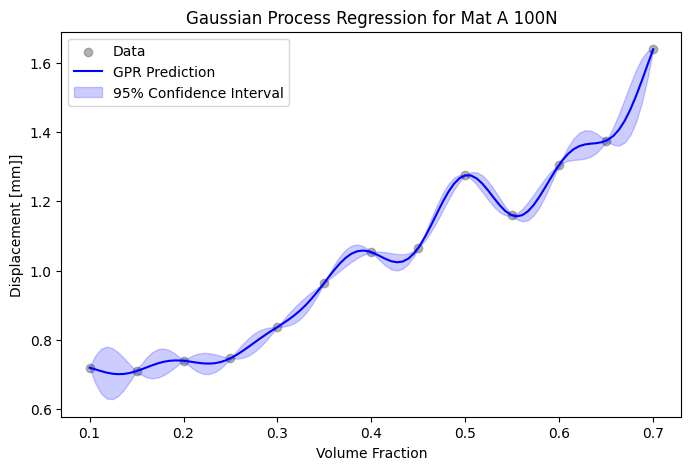

In [45]:
col_index = 8
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=0.6717, sigma=0.01)  # Intercept
    beta = pm.Normal("beta", mu=2, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Displacement [mm]]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


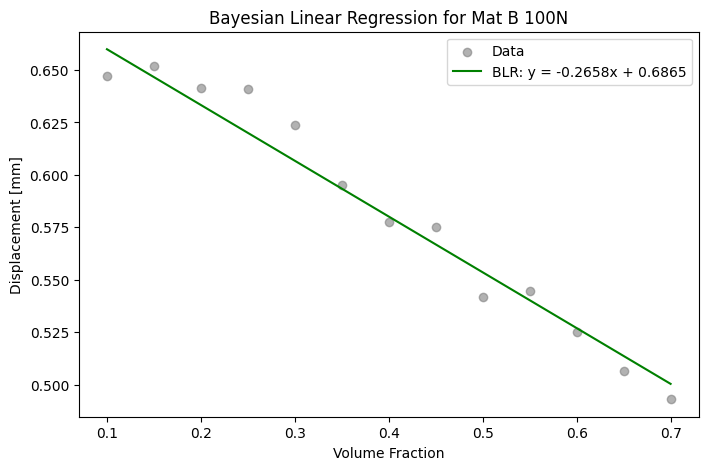

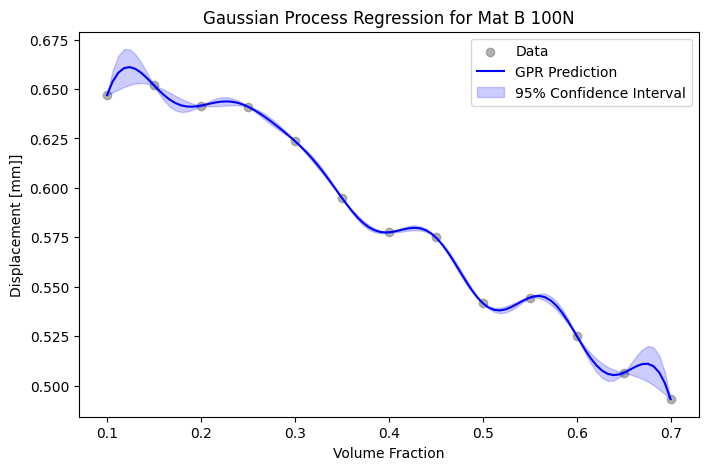

In [46]:
col_index = 9
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=0.6717, sigma=0.01)  # Intercept
    beta = pm.Normal("beta", mu=-2, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Displacement [mm]]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

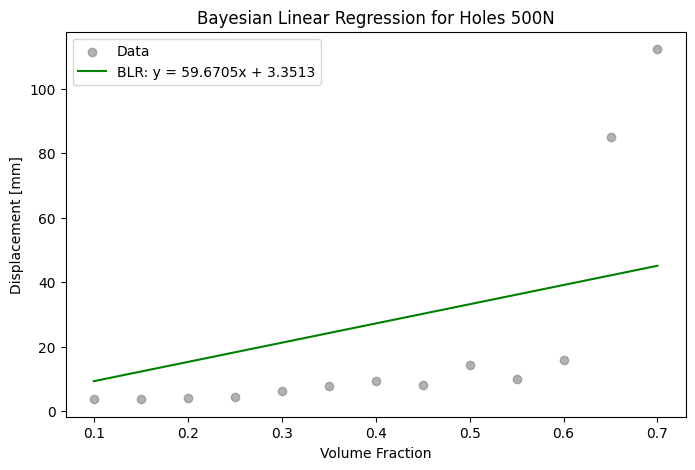

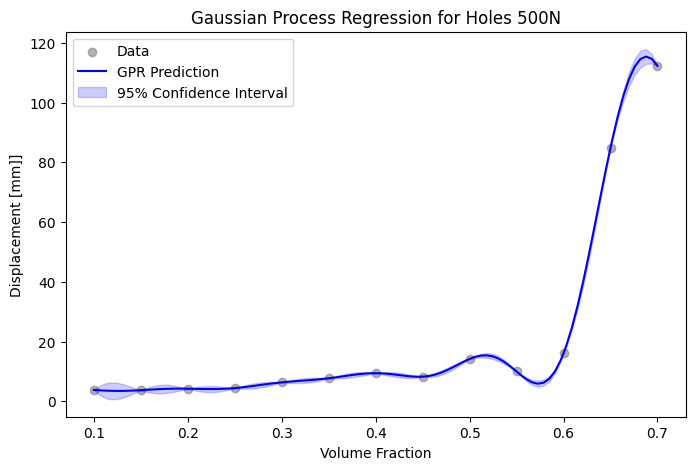

In [47]:
col_index = 10
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=3.358, sigma=0.1)  # Intercept
    beta = pm.Normal("beta", mu=2, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Displacement [mm]]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

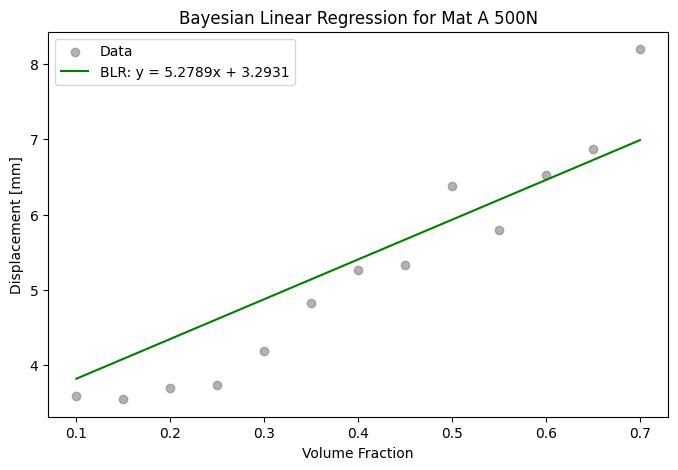

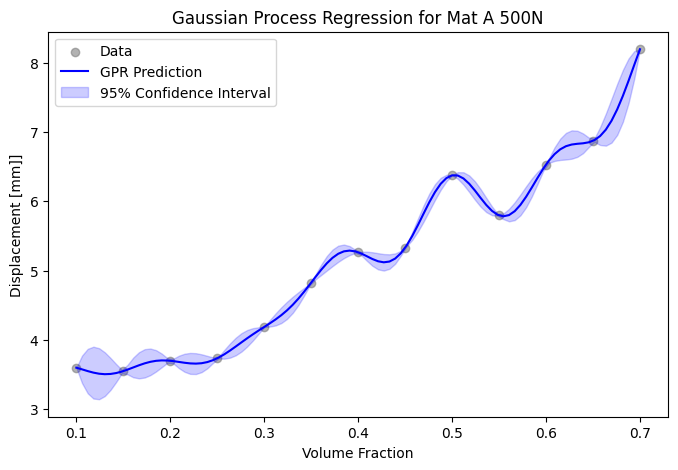

In [48]:
col_index = 11
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=3.358, sigma=0.1)  # Intercept
    beta = pm.Normal("beta", mu=1, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Displacement [mm]]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()


Output()

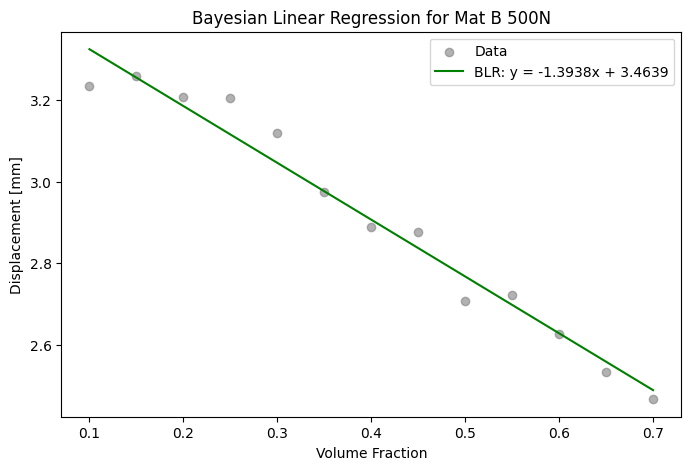

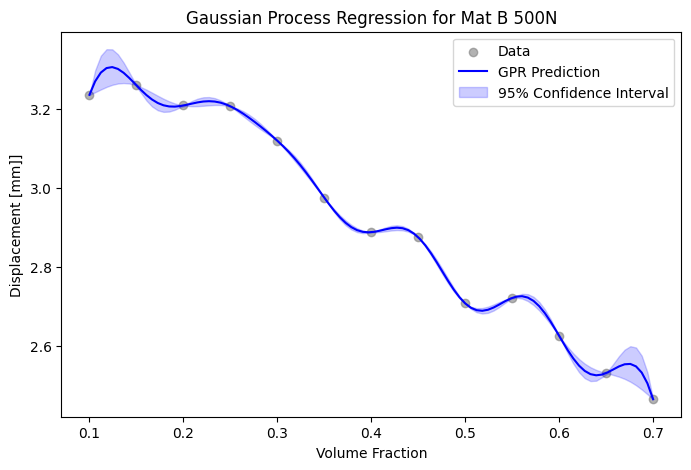

In [49]:
col_index = 12
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]


# BLR
with pm.Model() as modell:
    # Priors
    alpha = pm.Normal("alpha", mu=3.358, sigma=0.1)  # Intercept
    beta = pm.Normal("beta", mu=-1, sigma=50)  # Slope
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    mu = alpha + beta * X.flatten()
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, cores=2)

az.summary(trace)


alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, alpha_post + beta_post * X, color="green", label=f"BLR: y = {beta_post:.4f}x + {alpha_post:.4f}")
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f"Bayesian Linear Regression for {y_col}")
plt.legend()
plt.show()



# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X_pred, y_pred, color="blue", label="GPR Prediction")
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Volume Fraction")
plt.ylabel('Displacement [mm]]')
plt.title(f"Gaussian Process Regression for {y_col}")
plt.legend()
plt.show()
